In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [12]:
dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\masoka\Downloads\object detection\train",
    image_size = (256,256),
    batch_size = 32)

Found 1496 files belonging to 2 classes.


In [13]:
class_names = dataset.class_names
class_names

['lead', 'non lead']

In [14]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1]


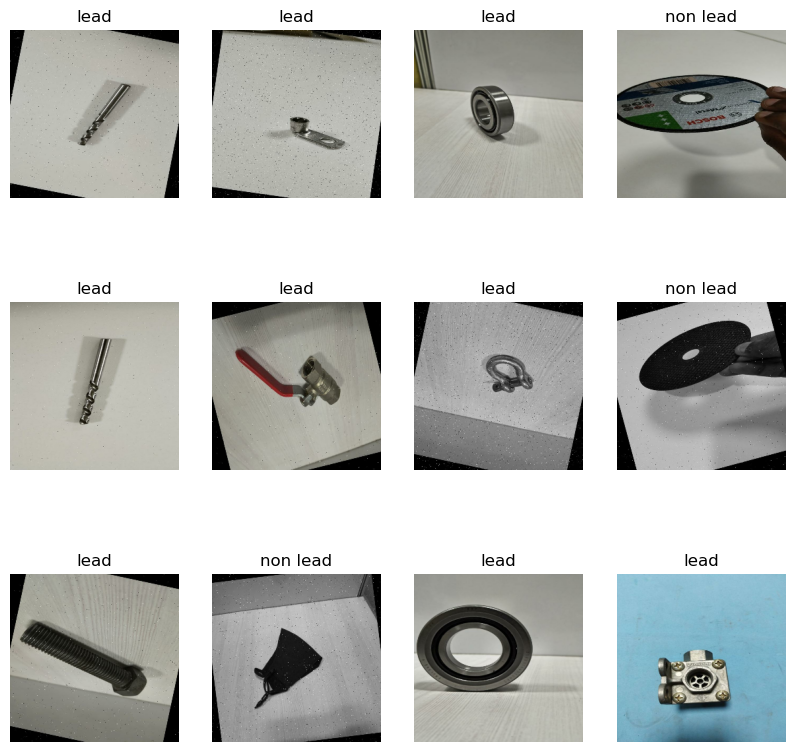

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [19]:
len(dataset)

47

In [20]:
train_ds = dataset.take(40)
len(train_ds)

40

In [21]:
test = dataset.skip(40)
len(test)

7

In [22]:
val_ds = test.take(3)
len(val_ds)

3

In [24]:
test_ds = test.skip(3)
len(test_ds)

4

In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([

    # 1st Conv + Pool
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),

    # 2nd Conv + Pool
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # 3rd Conv + Pool
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten + Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    
    layers.Dense(3, activation='softmax')
])

C:\Users\masoka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.summary()

In [26]:
model.compile(
    optimizer='adam',                     # how weights are updated
    loss='sparse_categorical_crossentropy',  # error function to minimize
    metrics=['accuracy']                  # what to monitor during training
)

In [27]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 565ms/step - accuracy: 0.6562 - loss: 47.7381 - val_accuracy: 0.7604 - val_loss: 0.6899
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 480ms/step - accuracy: 0.7492 - loss: 0.6082 - val_accuracy: 0.8229 - val_loss: 0.3884
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - accuracy: 0.8188 - loss: 0.4649 - val_accuracy: 0.8125 - val_loss: 0.4283
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - accuracy: 0.8414 - loss: 0.3853 - val_accuracy: 0.9375 - val_loss: 0.2428
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 472ms/step - accuracy: 0.8484 - loss: 0.3853 - val_accuracy: 0.8958 - val_loss: 0.2572
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - accuracy: 0.8438 - loss: 0.3085 - val_accuracy: 0.9062 - val_loss: 0.2270
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 478ms/step - accuracy: 0.8797 - loss: 0.2428 - val_accuracy: 0.9271 - val_loss: 0.1948
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - accuracy: 0.8906 - loss: 0.2266 - val_acc